___
# PROJETO 1

## <font color='red'>Jean Walper</font>
___

## <font color='blue'>"O" projeto</font>

## Introdução

Descreva aqui a motivação para escolha dos grupos e o que pretende analisar!

Exemplifique identificando uma pesquisa semelhante feita no Brasil ou no exterior que compare uma parcela da população (apossentados, imigrantes, mulheres, jovens) com todo resto. Critique esta pesquisa (que tipo de variáveis usou? Que recurso de estatística descritiva?). Pode ser um artigo de jornal.


___
## Análise e Resultados

In [38]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [39]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Jean Walper\Dropbox\Insper


In [40]:
#Leitura da base já em formato de DataFrame e extensão .csv
Data2014Bkp = pd.read_csv('PES2014.csv', sep=',')


In [41]:
#linha de backup (executar essa linha é mais rapido do que ler toda a tabela de novo)
Data2014 = Data2014Bkp

___

In [42]:
#filtrando as colunas para usar apenas as variaveis que me interessam
ListaDeVariaveisQueEuQuero = ["UF","V8005",'V4720','V9122','V9001',"V9002","V1252","V4719",'V9058'] # 'V0302' ,'V0404','V0711'

for Collum in Data2014: #sim, eu sei que "Collum" ta escrito errado...
    if not Collum in ListaDeVariaveisQueEuQuero:
        Data2014 = Data2014.drop(Collum,1)
Data2014.head(10)

,UF,V8005,V9001,V9002,V9058,V9122,V1252,V4719,V4720
0,11,27,1.0,NaN,44.0,4.0,NaN,1500.0,1500.0
1,11,28,3.0,4.0,NaN,4.0,NaN,NaN,0.0
2,11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,51,1.0,NaN,48.0,4.0,NaN,1200.0,1200.0
4,11,43,1.0,NaN,48.0,4.0,NaN,1100.0,1100.0
5,11,77,3.0,4.0,NaN,2.0,724.0,NaN,724.0
6,11,39,3.0,4.0,NaN,4.0,NaN,NaN,0.0
7,11,60,1.0,NaN,40.0,4.0,NaN,7000.0,7000.0
8,11,16,1.0,NaN,20.0,4.0,NaN,1500.0,1500.0
9,11,15,3.0,4.0,NaN,4.0,NaN,NaN,0.0


In [43]:
#Adicionando a variavel Regiao
Regiao = []
for i in Data2014.UF: #adicionando nova variavel "Região"
        i = int(i)
        if(i < 20):
            Regiao.append(1)
        elif(i<30):
            Regiao.append(2)
        elif(i<40):
            Regiao.append(3)
        elif(i<50):
            Regiao.append(4)
        elif(i<60):
            Regiao.append(5)

Trabalha = []
for i in range(0,Data2014.shape[0]):
        if Data2014.V9001[i] == 1 or Data2014.V9002[i] == 2:
            Trabalha.append("sim")
        else:
            Trabalha.append("Nao")
Data2014["Trabalha"] = Trabalha

Data2014["Região"] = Regiao
Data2014["Região"] = Data2014["Região"].astype('category')
Data2014["Região"].cat.categories = ('Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro_Oeste')

In [44]:
#aqui estou organizando os dados para interpretar a tabela
Data2014.columns = ["UF","Idade","Trabalhou na semana","Tinha trabalho na semana","Horas por semana","Aposentado","Renda aposentadoria","Renda trabalho","Renda mensal","Trabalha","Região"]

Data2014.UF = Data2014.UF.astype('category')
Data2014.UF.cat.categories = ("Rondonia", "Acre", "Amazonas", "Roraima", "Pará","Amapá","Tocantins", "Maranhão", "Piauí",
                              "Ceará", "Rio Grande do Norte","Paraíba", "Pernambuco", "Alagoas", "Sergipe", "Bahia",
                              "Minas Gerais","Espírito Santo", "Rio de Janeiro", "São Paulo", "Paraná", "Santa Catarina",
                               "Rio Grande do Sul", "Mato Grosso do Sul", "Mato Grosso", "Goiás", "Distrito Federal")

Data2014.Aposentado = Data2014.Aposentado.astype('category')
Data2014.Aposentado.cat.categories = ('Sim',"Nao")
Data2014["Trabalhou na semana"] = Data2014["Trabalhou na semana"].astype('category')
Data2014["Trabalhou na semana"].cat.categories = ('Sim',"Nao")
Data2014["Tinha trabalho na semana"] = Data2014["Tinha trabalho na semana"].astype('category')
Data2014["Tinha trabalho na semana"].cat.categories = ('Sim',"Nao")
Data2014.head(3)

,UF,Idade,Trabalhou na semana,Tinha trabalho na semana,Horas por semana,Aposentado,Renda aposentadoria,Renda trabalho,Renda mensal,Trabalha,Região
0,Rondonia,27,Sim,NaN,44.0,Nao,NaN,1500.0,1500.0,sim,Norte
1,Rondonia,28,Nao,Nao,NaN,Nao,NaN,NaN,0.0,Nao,Norte
2,Rondonia,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nao,Norte


In [45]:
Aposentados = Data2014[(Data2014.Aposentado == "Sim")]
ApNorte = Aposentados[Aposentados["Região"] == "Norte"]
ApSul = Aposentados[Aposentados["Região"] == "Sul"]
ApSudeste = Aposentados[Aposentados["Região"] == "Sudeste"]
ApCentroOeste = Aposentados[Aposentados["Região"] == "Centro_Oeste"]
ApNordeste = Aposentados[Aposentados["Região"] == "Nordeste"]

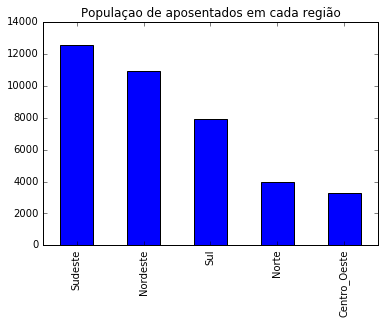

In [46]:
#Quantidade total de aposentados por região (considerando apenas os analisados pelo PNAD)
Aposentados["Região"].value_counts().plot.bar(title = 'Populaçao de aposentados em cada região')

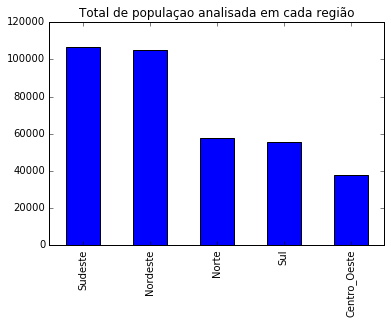

In [47]:
#Quantidade total da população em cada região (considerando apenas os analisados pelo PNAD)
Data2014["Região"].value_counts().plot.bar(title = 'Total de populaçao analisada em cada região')

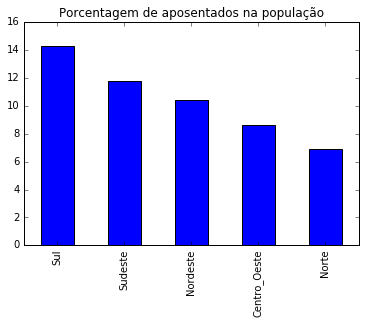

In [48]:
#Razão do total de população(analisada pelo PNAD) sobre a quantidade de aposentados, em cada região
((Aposentados["Região"].value_counts() / Data2014["Região"].value_counts()).reindex(["Sul","Sudeste",'Nordeste',
                                                                                    'Centro_Oeste','Norte']) * 100).plot.bar(title = 'Porcentagem de aposentados na população')

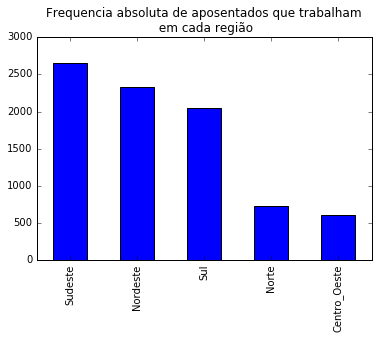

In [49]:
#quantos aposentados trabalham em cada regiao
Aposentados[Aposentados.Trabalha == 'sim']["Região"].value_counts().plot.bar(title = 'Frequencia absoluta de aposentados que trabalham\n em cada região')


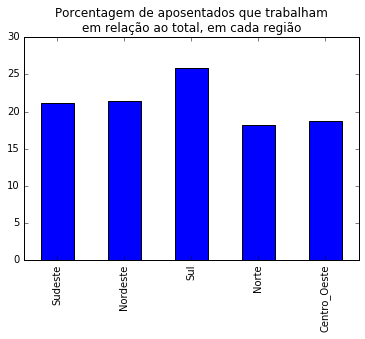

In [50]:
#Quantidade de aposentados que trabalham sobre o total, em cada região
((Aposentados[Aposentados.Trabalha == 'sim']["Região"].value_counts() / Aposentados["Região"].value_counts())*100).plot.bar(title = 'Porcentagem de aposentados que trabalham\nem relação ao total, em cada região')

In [51]:
#podemos ver a cima que todas as regiões tem mais ou menos a mesma proporção de aposentados que continuam trabalhando.
#Exceto o Sul, Por que? O sul tem uma diferença proxima a 0.05, isso pode não aprecer muito, mas é algo proximo a 25% da media
#das outras regiões.
#vou tentar explicar o por que dessa diferença no restante da pesquisa

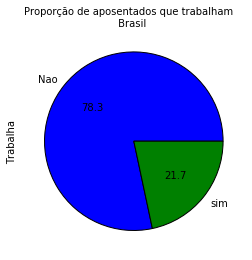

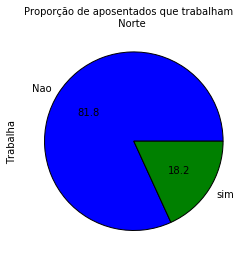

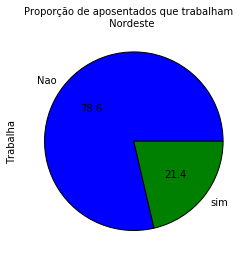

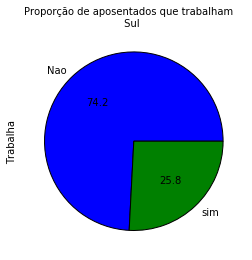

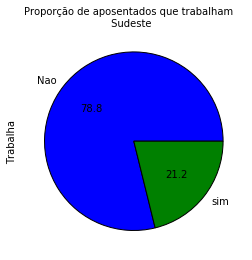

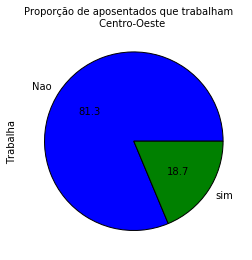

In [52]:

#Graficos de pizza de taxa de trabalho apos aposentadoria, no brasil e em cada região

Aposentados['Trabalha'].value_counts().plot(kind='pie', title = 'Proporção de aposentados que trabalham \n Brasil',autopct='%.1f', figsize=(4, 4), subplots = True)
plt.show()
ApNorte['Trabalha'].value_counts().plot(kind='pie', title = 'Proporção de aposentados que trabalham \n Norte',autopct='%.1f', figsize=(4, 4), subplots = True)
plt.show()
ApNordeste['Trabalha'].value_counts().plot(kind='pie', title = 'Proporção de aposentados que trabalham \n Nordeste',autopct='%.1f', figsize=(4, 4), subplots = True)
plt.show()
ApSul['Trabalha'].value_counts().plot(kind='pie', title = 'Proporção de aposentados que trabalham \n Sul',autopct='%.1f', figsize=(4, 4), subplots = True)
plt.show()
ApSudeste['Trabalha'].value_counts().plot(kind='pie', title = 'Proporção de aposentados que trabalham \n Sudeste',autopct='%.1f', figsize=(4, 4), subplots = True)
plt.show()
ApCentroOeste['Trabalha'].value_counts().plot(kind='pie', title = 'Proporção de aposentados que trabalham \n Centro-Oeste',autopct='%.1f', figsize=(4, 4), subplots = True)
plt.show()

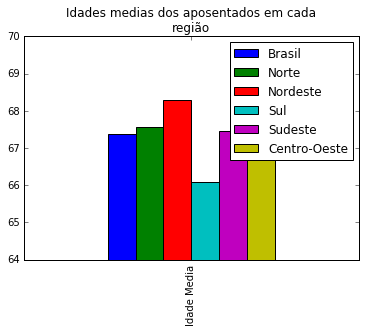

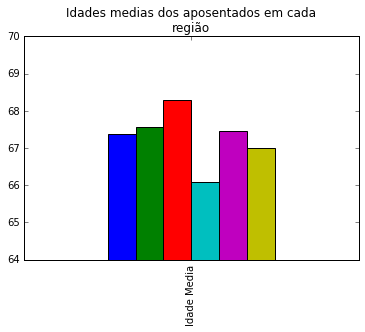

In [53]:
#Idade media dos aposentados de cada Região
IdadeMedia = pd.DataFrame(index=["Idade Media"], columns=['Brasil',"Norte","Nordeste","Sul","Sudeste","Centro-Oeste"])
IdadeMedia.Brasil = Aposentados["Idade"].mean()
IdadeMedia["Norte"] = Aposentados[Aposentados.Região == "Norte"]["Idade"].mean()
IdadeMedia["Nordeste"] = Aposentados[Aposentados.Região == "Nordeste"]["Idade"].mean()
IdadeMedia["Sul"] = Aposentados[Aposentados.Região == "Sul"]["Idade"].mean()
IdadeMedia["Sudeste"] = Aposentados[Aposentados.Região == "Sudeste"]["Idade"].mean()
IdadeMedia["Centro-Oeste"] = Aposentados[Aposentados.Região == "Centro_Oeste"]["Idade"].mean()
IdadeMedia.plot.bar(ylim = (64,70),legend = True,title = 'Idades medias dos aposentados em cada\nregião')
IdadeMedia.plot.bar(ylim = (64,70),legend = False,title = 'Idades medias dos aposentados em cada\nregião')


In [54]:
#Podemos ver a cima que o Sul tem aposentados mais jovems do que o geral, outra vez sendo um dos casos limites
#de uma analise, mesmo não tendo uma diferença tão grande quanto na comparação da proporção de aposentados que mantém um emprego

In [55]:
#abaixo comparo as rendas medias dos aposentados emcada regiões de varias formas

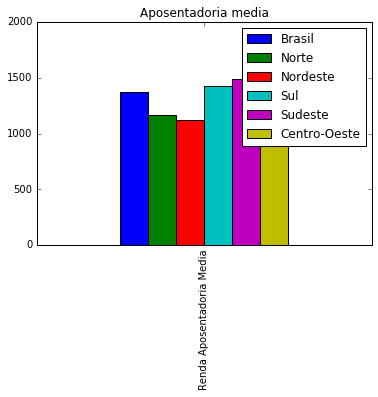

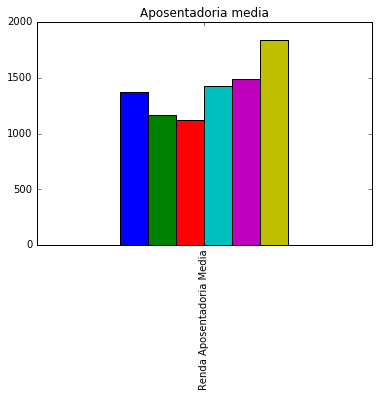

In [56]:
#renda media derivada da aposentadoria
RendaMedia = pd.DataFrame(index=["Renda Aposentadoria Media"], columns=['Brasil',"Norte","Nordeste","Sul","Sudeste","Centro-Oeste"])
RendaMedia.Brasil = Aposentados[Aposentados["Renda aposentadoria"] <= 99999999]["Renda aposentadoria"].mean()
RendaMedia["Norte"] = Aposentados[(Aposentados.Região == "Norte") & (Aposentados["Renda aposentadoria"] <= 99999999)]["Renda aposentadoria"].mean()
RendaMedia["Nordeste"] = Aposentados[(Aposentados.Região == "Nordeste") & (Aposentados["Renda aposentadoria"] <= 99999999)]["Renda aposentadoria"].mean()
RendaMedia["Sul"] = Aposentados[(Aposentados.Região == "Sul") & (Aposentados["Renda aposentadoria"] <= 99999999)]["Renda aposentadoria"].mean()
RendaMedia["Sudeste"] = Aposentados[(Aposentados.Região == "Sudeste") & (Aposentados["Renda aposentadoria"] <= 99999999)]["Renda aposentadoria"].mean()
RendaMedia["Centro-Oeste"] = Aposentados[(Aposentados.Região == "Centro_Oeste") & (Aposentados["Renda aposentadoria"] <= 99999999)]["Renda aposentadoria"].mean()
RendaMedia.plot.bar(legend = True,title = 'Aposentadoria media')
RendaMedia.plot.bar(legend = False,title = 'Aposentadoria media')

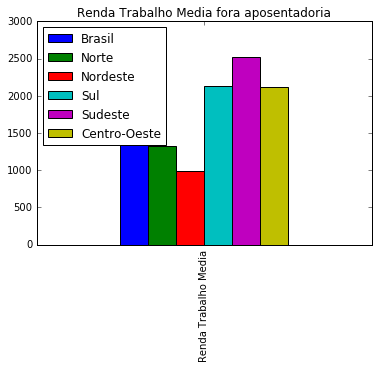

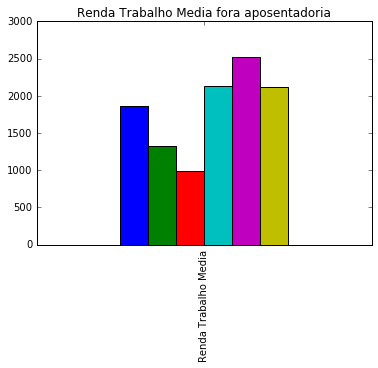

In [57]:
#renda media derivada do trabalho fora a aposentadoria
RendaMedia = pd.DataFrame(index=["Renda Trabalho Media"], columns=['Brasil',"Norte","Nordeste","Sul","Sudeste","Centro-Oeste"])

RendaMedia.Brasil = Aposentados[(Aposentados.Trabalha == 'sim') & (Aposentados['Renda trabalho'] <= 99999999)]["Renda trabalho"].mean()

RendaMedia["Norte"] = Aposentados[((Aposentados.Região == "Norte") & (Aposentados.Trabalha == 'sim')) & (Aposentados['Renda trabalho'] <= 99999999)]["Renda trabalho"].mean()

RendaMedia["Nordeste"] = Aposentados[((Aposentados.Região == "Nordeste") & (Aposentados.Trabalha == 'sim')) & (Aposentados['Renda trabalho'] <= 99999999)]["Renda trabalho"].mean()

RendaMedia["Sul"] = Aposentados[((Aposentados.Região == "Sul") & (Aposentados.Trabalha == 'sim') & (Aposentados['Renda trabalho'] <= 99999999))]["Renda trabalho"].mean()

RendaMedia["Sudeste"] = Aposentados[((Aposentados.Região == "Sudeste") & (Aposentados.Trabalha == 'sim')) & (Aposentados['Renda trabalho'] <= 99999999)]["Renda trabalho"].mean()

RendaMedia["Centro-Oeste"] = Aposentados[((Aposentados.Região == "Centro_Oeste") & (Aposentados.Trabalha == 'sim')) & (Aposentados['Renda trabalho'] <= 99999999)]["Renda trabalho"].mean()

RendaMedia.plot.bar(legend = True,title = 'Renda Trabalho Media fora aposentadoria')

RendaMedia.plot.bar(legend = False,title = 'Renda Trabalho Media fora aposentadoria')

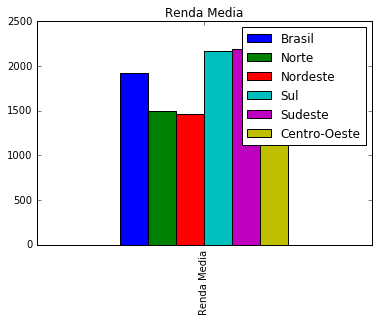

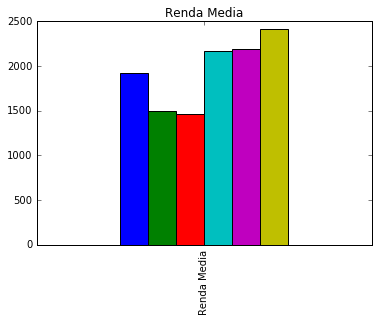

In [58]:
#renda media derivada de todas as fontes
RendaMedia = pd.DataFrame(index=["Renda Media"], columns=['Brasil',"Norte","Nordeste","Sul","Sudeste","Centro-Oeste"])

RendaMedia.Brasil = Aposentados[(Aposentados['Renda mensal'] <= 99999999)]["Renda mensal"].mean()

RendaMedia["Norte"] = Aposentados[((Aposentados.Região == "Norte")) & (Aposentados['Renda mensal'] <= 99999999)]["Renda mensal"].mean()

RendaMedia["Nordeste"] = Aposentados[((Aposentados.Região == "Nordeste") ) & (Aposentados['Renda mensal'] <= 99999999)]["Renda mensal"].mean()

RendaMedia["Sul"] = Aposentados[((Aposentados.Região == "Sul")  & (Aposentados['Renda mensal'] <= 99999999))]["Renda mensal"].mean()

RendaMedia["Sudeste"] = Aposentados[((Aposentados.Região == "Sudeste") ) & (Aposentados['Renda mensal'] <= 99999999)]["Renda mensal"].mean()

RendaMedia["Centro-Oeste"] = Aposentados[((Aposentados.Região == "Centro_Oeste") ) & (Aposentados['Renda mensal'] <= 99999999)]["Renda mensal"].mean()

RendaMedia.plot.bar(legend = True,title = 'Renda Media')

RendaMedia.plot.bar(legend = False,title = 'Renda Media')

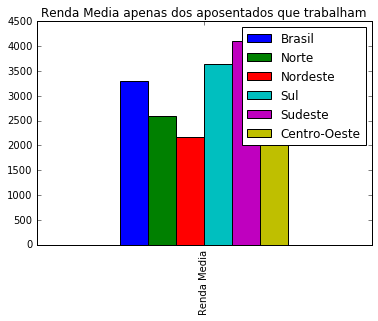

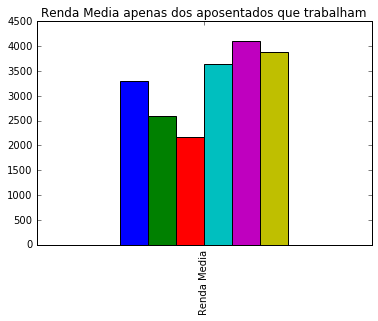

In [59]:
#renda media derivada de todas as fontes, considerando apenas quem é aposentdo e ainda trabalha
RendaMedia = pd.DataFrame(index=["Renda Media"], columns=['Brasil',"Norte","Nordeste","Sul","Sudeste","Centro-Oeste"])

RendaMedia.Brasil = Aposentados[(Aposentados.Trabalha == 'sim') & (Aposentados['Renda mensal'] <= 99999999)]["Renda mensal"].mean()

RendaMedia["Norte"] = Aposentados[((Aposentados.Região == "Norte") & (Aposentados.Trabalha == 'sim')) & (Aposentados['Renda mensal'] <= 99999999)]["Renda mensal"].mean()

RendaMedia["Nordeste"] = Aposentados[((Aposentados.Região == "Nordeste") & (Aposentados.Trabalha == 'sim')) & (Aposentados['Renda mensal'] <= 99999999)]["Renda mensal"].mean()

RendaMedia["Sul"] = Aposentados[((Aposentados.Região == "Sul") & (Aposentados.Trabalha == 'sim') & (Aposentados['Renda mensal'] <= 99999999))]["Renda mensal"].mean()

RendaMedia["Sudeste"] = Aposentados[((Aposentados.Região == "Sudeste") & (Aposentados.Trabalha == 'sim')) & (Aposentados['Renda mensal'] <= 99999999)]["Renda mensal"].mean()

RendaMedia["Centro-Oeste"] = Aposentados[((Aposentados.Região == "Centro_Oeste") & (Aposentados.Trabalha == 'sim')) & (Aposentados['Renda mensal'] <= 99999999)]["Renda mensal"].mean()

RendaMedia.plot.bar(legend = True,title = 'Renda Media apenas dos aposentados que trabalham')

RendaMedia.plot.bar(legend = False,title = 'Renda Media apenas dos aposentados que trabalham')

Podemos ver que o sul não teve nenhum comportamente anormal nas analiss de rendas, e tmb vemos que o Centro-Oeste
Tem a maior renda media vinda apenas da aposentadoria, o que pode explicar o por que da proporção baixa entre aposentados
que ainda trabalham.

Ja que a renda não parece ser um fator que influencia a procura por emprego de aposentados no Sul, podemos olhar a
Idade dos aposentados...

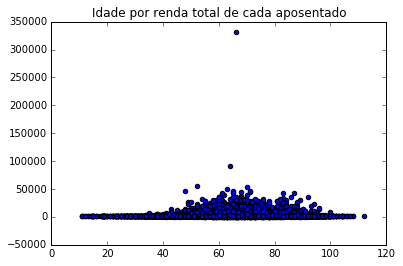

In [60]:
#Esse grafico mostra um geral da relação da idade com a renda total(aposentadoria mais trabalho(se houver))
plt.scatter(Aposentados[Aposentados["Renda mensal"] <= 99999999]["Idade"],Aposentados[Aposentados["Renda mensal"] <= 99999999]["Renda mensal"])
plt.title('Idade por renda total de cada aposentado')

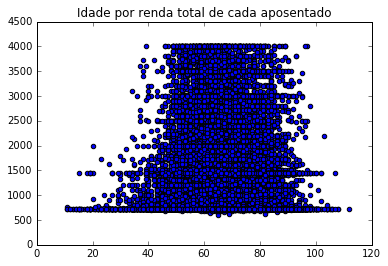

Disperção por idade no Sul


C:\Users\Jean Walper\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


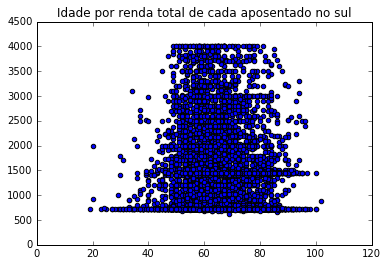

In [61]:
#Como existem pessoas muito felizes estragando a escala do meu grafico, decidi deixa-los lá sendo felizes e ganhando mais do que
#eu acho nessessario analisar para incluir pessoas comuns, e vou refazer esse plot com um limite de renda de R$4000 .

plt.scatter(Aposentados[Aposentados["Renda mensal"] <= 4000]["Idade"],Aposentados[Aposentados["Renda mensal"] <= 4000]["Renda mensal"])
plt.title('Idade por renda total de cada aposentado')
plt.show()
print('Disperção por idade no Sul')
plt.scatter(ApSul[Aposentados["Renda mensal"] <= 4000]["Idade"],ApSul[Aposentados["Renda mensal"] <= 4000]["Renda mensal"])
plt.title('Idade por renda total de cada aposentado no sul')
plt.show()

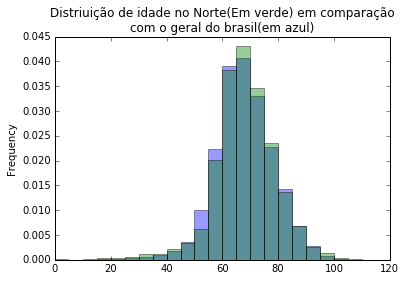

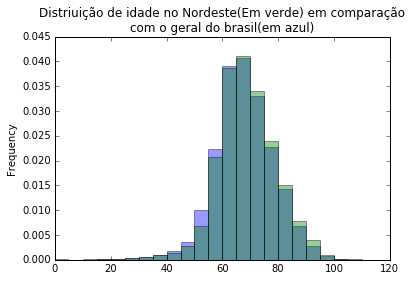

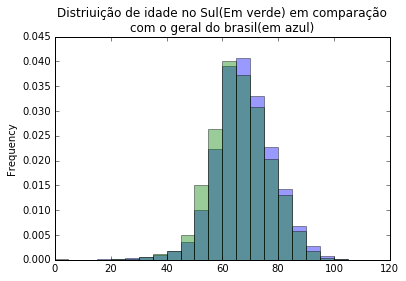

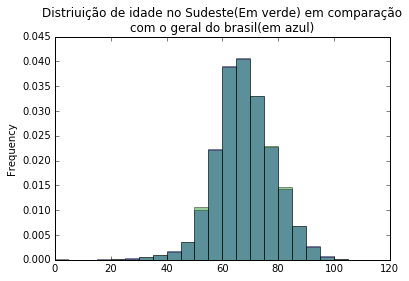

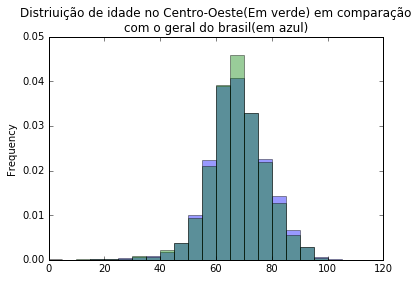

In [62]:
#Os graficos de disperção não mostram dados relevantes para a analise nesse momento, então vamos ver a distribuição dos
#aposentados por idade em cada região.

FaixaDeIdade = range(0,120,5)

Aposentados['Idade'].plot.hist(bins = FaixaDeIdade,title = 'Distriuição de idade geral',normed = True,alpha = 0.4)
Aposentados[Aposentados.Região == 'Norte']['Idade'].plot.hist(bins = FaixaDeIdade,title = 'Distriuição de idade no Norte(Em verde) em comparação\ncom o geral do brasil(em azul)',normed = True,alpha = 0.4)
plt.show()
Aposentados['Idade'].plot.hist(bins = FaixaDeIdade,title = 'Distriuição de idade geral',normed = True,alpha = 0.4)
Aposentados[Aposentados.Região == 'Nordeste']['Idade'].plot.hist(bins = FaixaDeIdade,title = 'Distriuição de idade no Nordeste(Em verde) em comparação\ncom o geral do brasil(em azul)',normed = True,alpha = 0.4)
plt.show()
Aposentados['Idade'].plot.hist(bins = FaixaDeIdade,title = 'Distriuição de idade geral',normed = True,alpha = 0.4)
Aposentados[Aposentados.Região == 'Sul']['Idade'].plot.hist(bins = FaixaDeIdade,title = 'Distriuição de idade no Sul(Em verde) em comparação\ncom o geral do brasil(em azul)',normed = True,alpha = 0.4)
plt.show()
Aposentados['Idade'].plot.hist(bins = FaixaDeIdade,title = 'Distriuição de idade geral',normed = True,alpha = 0.4)
Aposentados[Aposentados.Região == 'Sudeste']['Idade'].plot.hist(bins = FaixaDeIdade,title = 'Distriuição de idade no Sudeste(Em verde) em comparação\ncom o geral do brasil(em azul)',normed = True,alpha = 0.4)
plt.show()
Aposentados['Idade'].plot.hist(bins = FaixaDeIdade,title = 'Distriuição de idade geral',normed = True,alpha = 0.4)
Aposentados[Aposentados.Região == 'Centro_Oeste']['Idade'].plot.hist(bins = FaixaDeIdade,title = 'Distriuição de idade no Centro-Oeste(Em verde) em comparação\ncom o geral do brasil(em azul)',normed = True,alpha = 0.4)
plt.show()

Uhull! com os histogramas acima podemos ver que, no grafico que compara a distribuição do sul, ele tem uma simetria mais a
esquerda (tomara que eu tenha acertado isso) do que a distribuição geral no brasil.
isso quer dizer que o sul tem uma proporção maior de pessoas mais novas ja aposentadas, isso ajuda a explicar o por que 
de que essa região tem uma Idade media (de aposentados) menor.

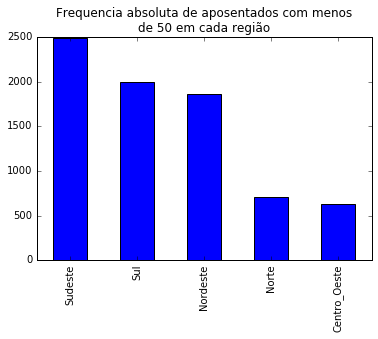

In [63]:
#vamos então ver um grafico que mostra a quantidade de pessoas aposentadas abaixo de 60 aos em cada região, acredito que
#O sul vai estar em primeiro no "Top regiões com mais quantidades de aposentados com menos de 60 anos".
Aposentados[Aposentados.Idade < 60]["Região"].value_counts().plot.bar(title = 'Frequencia absoluta de aposentados com menos\nde 50 em cada região')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD2B170D68>], dtype=object)

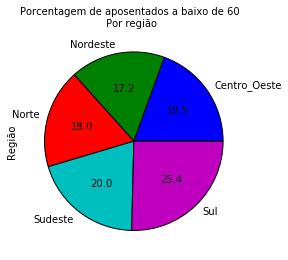

In [64]:
#surpreendentemente aqui, o Sul não ficou em primeiro. isso ocorreu pois o ultimo grafico considerou apenas a quantidade total
#De aposentados em cada Região, sem se importar com a quantidade total para mostrar o "Ranking"
#Aboixo temos o mesmo grafico, agora mostrando a relação entre o total de aposentados com os menors de 60.
((Aposentados[Aposentados.Idade < 60]["Região"].value_counts() / Aposentados["Região"].value_counts()) * 100).plot(kind='pie', title = 'Porcentagem de aposentados a baixo de 60\n Por região',autopct='%.1f', figsize=(4, 4), subplots = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD2BE676D8>], dtype=object)

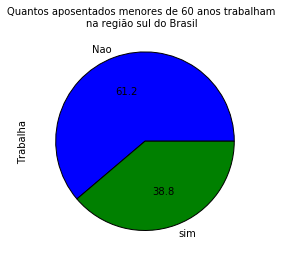

In [65]:
#Agora que sabemos que o sul tem uma taxa maior de aposentados mais jovens, o quanto isso influencia na quantidade de aposentados
#que trabalham? vejamos uma comparação.
(Aposentados[(Aposentados.Idade < 60) & (Aposentados.Região == "Sul")]["Trabalha"].value_counts()).plot(kind='pie', title = 'Quantos aposentados menores de 60 anos trabalham\nna região sul do Brasil',autopct='%.1f', figsize=(4, 4), subplots = True)

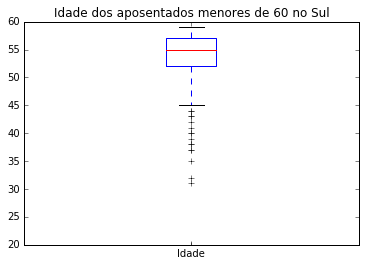

In [66]:
#e para ajudar nessa comparação, veremos as idades desses aposentados menores de 60, no Sul.
Aposentados[(Aposentados.Trabalha == 'sim') & (Aposentados.Idade < 60) & (Aposentados.Região == 'Sul')]['Idade'].plot.box(title = 'Idade dos aposentados menores de 60 no Sul')

In [67]:
#O boxplot acima mostra que apesar de haverem mais pessoas abaixo dos 60 no Sul, a maioria não fica muito abaixo de 60, podemos ver
#que mais de 75% dessas pessoas ficam acima de 50 anos.

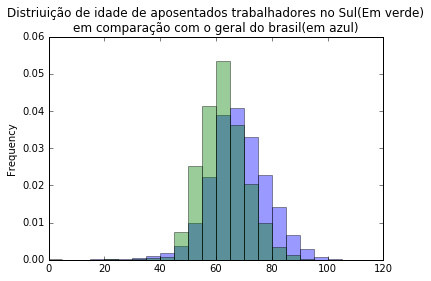

In [68]:
#E tambem um histograma da distribuição da idade dos aposentados que trabalham,novamente em comparação a faixa de idade geral no brasil.
Aposentados['Idade'].plot.hist(bins = FaixaDeIdade,title = 'Distriuição de idade geral',normed = True,alpha = 0.4)
Aposentados[(Aposentados.Trabalha == 'sim') & (Aposentados.Região == 'Sul')]['Idade'].plot.hist(bins = FaixaDeIdade,title = 'Distriuição de idade de aposentados trabalhadores no Sul(Em verde)\nem comparação com o geral do brasil(em azul)',normed = True,alpha = 0.4)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD2B952E48>], dtype=object)

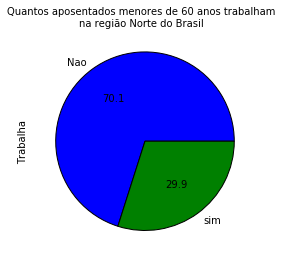

In [69]:
#Para termos certeza de que a quantidade extra de aposentados com emprego no Sul se deve a idade dos aposentados, vamos fazer
#a mesma com o brasil como um todo:
(Aposentados[(Aposentados.Idade < 60)]["Trabalha"].value_counts()).plot(kind='pie', title = 'Quantos aposentados menores de 60 anos trabalham\nna região Norte do Brasil',autopct='%.1f', figsize=(4, 4), subplots = True)

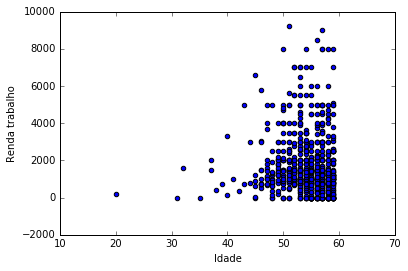

In [70]:
#Vamos comparar agora a renda dessas pessoas com as idades delas
Aposentados[(Aposentados.Idade < 60) & (Aposentados.Região == 'Sul') & (Aposentados.Trabalha == 'sim') & (Aposentados['Renda trabalho'] < 10000)].plot.scatter('Idade','Renda trabalho')

40.0    1917
30.0     793
20.0     785
44.0     652
48.0     454
50.0     339
24.0     225
60.0     204
10.0     202
36.0     190
Name: Horas por semana, dtype: int64

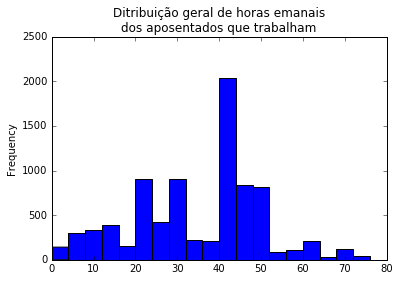

In [71]:
#Podemos ver que a idade pode influenciar a renda, provavelmente apenas a renda maxima, mas influencia de certo modo.
#Vamos agora comparar a quantidade de horas trabalhadas para ver se encontramos alguma relação.
Aposentados[Aposentados.Trabalha == 'sim']["Horas por semana"].plot.hist(bins = range(0,80,4), title = "Ditribuição geral de horas emanais\ndos aposentados que trabalham")
Aposentados[Aposentados.Trabalha == 'sim']["Horas por semana"].value_counts().head(10)

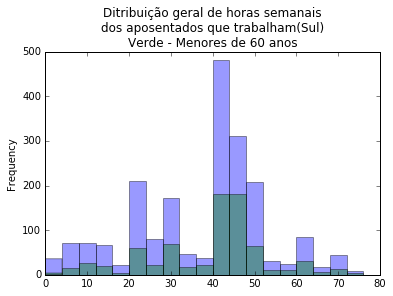

In [72]:

Aposentados[(Aposentados.Trabalha == 'sim') & (Aposentados.Região == 'Sul')]["Horas por semana"].plot.hist(bins = range(0,80,4), title = "Ditribuição geral de horas emanais\ndos aposentados que trabalham", alpha = 0.4)
Aposentados[(Aposentados.Trabalha == 'sim') & (Aposentados.Região == 'Sul') & (Aposentados.Idade < 60)]["Horas por semana"].plot.hist(bins = range(0,80,4), title = "Ditribuição geral de horas semanais\ndos aposentados que trabalham(Sul)\nVerde - Menores de 60 anos", alpha = 0.4)


Importe perceber que no grafico, a quantidade de pessoas no sul é obviamente menor do qu a do total. Mas o importante é observar o formato dos graficos, e a proporção de cada faixa, do sul pelo total.

(0, 120.0, 0, 50000.0)

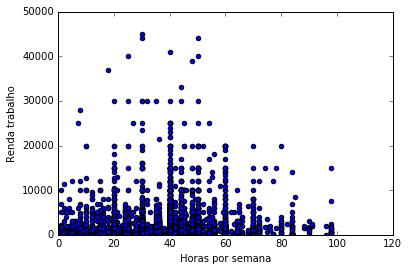

In [73]:
#Renda por hora de trabalho, estranhamente, tem pouca relação, mas é bom perceber que mesmo aumentando as horas trabalhadas
#a renda maxima pareceu diminuir ao inves de aumentar.
Aposentados[(Aposentados.Trabalha == 'sim') & (Aposentados['Renda trabalho'] < 50000)].plot.scatter('Horas por semana','Renda trabalho')
plt.axis((0, 120.0, -0, 50000.0))

___
## Conclusão 

Descreva aqui suas conclusões! (descreverei aqui minha conclusões)


  No começo desta analise, inspirado por varios esteriotipos e supestiçoes, decidi analisar a aposentadoria de cada uma das 5 macro-regiões brasileiras.
  
  As regiões parecem todas se comportar da mesma forma, mas uma sempre apareceu se destacando em algumas variaveis, a região Sul. A região sul tem uma proporção maior de aposentados em sua população e de aposentados que mantém um emprego. Ao perceber isso, e ver o grafico de idades medias em cada região, é facil perceber que o Sul se destaca de novo como sendo a região com a menor idade media dos seus aposentados, mesmo que não seja uma difereçao tão grande.
  
  As variaveis de renda e de horas de trablho foram analisadas para ver se isso influenciava as escolhas dos aposentados a continuar em um emprego. Porem percebemos facilmente nos graficos de rendas medias que o Sul não é destaque em salarios, e portanto esse não era o fator determinante.
  
  Como a renda não influenciava a escolha de manter um emprego(considerando a mesma proporção de ganho das outras regiões), deveria haver outro fator. Então foi analisada a idade dos aposentados em cada região, e como esperado, o Sul sempre mostrou ter uma predominancia de pessoas mais jovens ja aposentadas, tendo a maior proporção de aposentados menores de 60 anos, e uma distribuição de idade que tendia mais a esquerda do que a distribuição geral do Brasil.
  
  O grafico de boxplot mostrou tambem que apesar do Sul ter uma distribuição maior de aposentados abaixo de 60 anos, esses não aparecem muito abaixo dessa faixa, predominando na faixa dos 50-59 anos.
  
  Tudo isso me permite concluir que os aposentados no Sul são mais jovens, em geral, no Sul. E também, essa dierença de idade, mesmo que sutil, influenciou na quantidade de aposentados que decidiram ter um emprego alem da aposentadoria, isso talvez venha da disposição dos indivuduos, ou por algum fator social como cargos publicos duplos, onde o aposentado pede a aposentadoria em um cargo, mas por diversos motivos, continua exercendo o outro.
  
  Seja por qual for o motivo dessa diferença de idade, minha analise serve como uma rgumento de exemplo, que indica que a idade dos aposentados influencia diretamente na quantidade de aposentados que preferem manter um emprego, sem ter muita influencia na renda, ou na media dos valores das proprias aposentadorias.
